# Exploratory Data Analysis

### Import Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Load Data

In [2]:
dialysis = pd.read_csv('capstone2_dialysis_cleaned_data.csv', index_col=0)

### Explore Data

In [ ]:
dialysis.head()

In [ ]:
dialysis.shape

In [ ]:
dialysis.info()

In [ ]:
dialysis.columns

### Thin to Relevent Data Columns
Columns with category text were not included as they are only there to indicate if the data was better, worse or as expected.
Columns with confidence limits were not included as they are just limit the upper and lower confidence limits of the rating's data.
Columns with number of patients were not included as they do not provide any real data just counts of the number of patients used to come up with percentages and rates which are shown in other columns.
Other columns such as zip and phone number were not included as they are just further indicators of facility locations.

In [3]:
dialysis_columns =['Network',
                   'State',
                   'Facility Name',
                   'Five Star', 
                   'Profit Or Non-Profit', 
                   'Chain Owned',
                   'Chain Organization', 
                   'Late Shift', 
                   'Number Of Dialysis Stations',
                   'Offers In-Center Hemodialysis', 
                   'Offers Peritoneal Dialysis',
                   'Offers Home Hemodialysis Training',
                   'Percentage Of Medicare Patients With Hgb < 10 g/dL',
                   'Percentage Of Medicare Patients With Hgb > 12 g/dL',
                   'Percent Of Adult HD Patients With Kt/V >= 1.2',
                   'Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL)',
                   'Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL',
                   'Mortality Rate (Facility)',
                   'Readmission Rate (Facility)',
                   'Hospitalization Rate (Facility)',
                   'Standard Infection Ratio',
                   'Transfusion Rate (Facility)',
                   'Fistula Rate (Facility)',
                   'Percentage Of Adult Patients With Long Term Catheter In Use',
                   'Standardized First Kidney Transplant Waitlist Ratio',
                   'Percentage Of Prevalent Patients Waitlisted']

In [4]:
dialysis = dialysis[dialysis_columns]

In [ ]:
dialysis.shape

### Correlations

In [ ]:
dialysis.corr()

In [ ]:
plt.figure(figsize=(40,20))
dialysis_heatmap = sns.heatmap(dialysis.corr(), annot=True)

#### Moderate Correlations (0.3-0.7)

**-0.3** : Transfusion Rate (Facility) & Five Star

**0.32** : Chain Owned & Profit or Non-Profit

**-0.32** : Mortality Rate (Facility) & Five Star

**-0.32** : Readmission Rate (Facility) & Five Star

**-0.33** : Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL & Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL

**0.34** : Percent Of Adult HD Patients With Kt/V >= 1.2 & Five Star

**-0.34** : Percentage Of Adult Patients With Long Term Catheter In Use & Percent Of Adult HD Patients With Kt/V >= 1.2

**-0.39** : Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL & Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL

**-0.39** : Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL & Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL

**0.4** : Percentage Of Adult Patients With Serum Phosphorus Between 3.5 & 4.5 mg/dL & Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL

**0.42** : Hospitalization Rate (Facility) & Readmission Rate (Facility)

**0.43** : Percentage Of Prevalent Patients Waitlisted & Standardized First Kidney Transplant Waitlist Ratio

**-0.43** : Hospitalization Rate (Facility) & Five Star

**0.44** : Offers In-Center Hemodialysis & Number of Dialysis Stations

**-0.47** : Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL) & Percent Of Adult HD Patients With Kt/V >= 1.2

**-0.5** : Percentage Of Adult Patients With Long Term Catheter In Use - Fistula Rate (Facility)

**0.51** : Fistula Rate (Facility) - Five Star

**-0.53** : Percentage Of Adult Patients With Long Term Catheter In Use - Five Star

**-0.55** : Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL - Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL

**-0.59** : Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL - Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL

#### Strong Correlation(>0.7)
**-0.71** : Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL - Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL

### Strong Correlations

#### Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL
Corr: -0.71

In [ ]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL', y='Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL', data=dialysis, kind='reg')
_ = plt.xlabel('% Adult Patient W/ Serum Phos > 7.0 mg/dL')
_ = plt.ylabel('% Adult Patient W/ Serum Phos 3.5-4.5 mg/dL')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL')

### Moderate Correlations (0.3-0.7)

In [ ]:
# Create dataframe with only the columns found to have a moderate correlation
dialysis_modcorr_columns =['Five Star', 
                   'Profit Or Non-Profit', 
                   'Chain Owned',
                   'Number Of Dialysis Stations',
                   'Offers In-Center Hemodialysis', 
                   'Percent Of Adult HD Patients With Kt/V >= 1.2',
                   'Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL)',
                   'Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL',
                   'Mortality Rate (Facility)',
                   'Readmission Rate (Facility)',
                   'Hospitalization Rate (Facility)',
                   'Transfusion Rate (Facility)',
                   'Fistula Rate (Facility)',
                   'Percentage Of Adult Patients With Long Term Catheter In Use',
                   'Standardized First Kidney Transplant Waitlist Ratio',
                   'Percentage Of Prevalent Patients Waitlisted']
dialysis_modcorr = dialysis[dialysis_modcorr_columns]

In [ ]:
# Use dataframe with moderate correlation columns to create a pair plot
plt.figure(figsize=(40,20))
dialysis_pairplot = sns.pairplot(dialysis_modcorr, height=2)

# Rotate label names
for ax in dialysis_pairplot.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

### Individual look at moderate correlations
- Correlations between two continuous variables will use sns.jointplot() with kind='reg'

- Correlations between one discrete variable and one continous variable will use sns.violinplot()

- Correlations between two discrete variables will use sns.countplot()

*Correlations are listed from strongest to weakest*

#### Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL
Corr: -0.59

In [ ]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL', y='Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL', data=dialysis, kind="reg")
_ = plt.xlabel('% Adult Patient W/ Serum Phos 5.6 - 7.0 mg/dL')
_ = plt.ylabel('% Adult Patient W/ Serum Phos 3.5-4.5 mg/dL')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL')

#### Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL
Corr: -0.55

In [ ]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL', y='Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL', data=dialysis, kind="reg")
_ = plt.xlabel('% Adult Patient W/ Serum Phos 5.6 - 7.0 mg/dL')
_ = plt.ylabel('% Adult Patient W/ Serum Phos 4.6 - 5.5 mg/dL')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL')

#### Five Star vs. Percentage Of Adult Patients With Long Term Catheter In Use
Corr: -0.53

In [ ]:
_ = sns.violinplot(x='Five Star', y='Percentage Of Adult Patients With Long Term Catheter In Use', data=dialysis)
_ = plt.ylabel('% Adult Patients w/ Long Term Catheter')
_ = plt.title('Five Star vs. Percentage Of Adult Patients With Long Term Catheter In Use')

#### Five Star vs. Fistula Rate (Facility)
Corr: 0.51

In [ ]:
_ = sns.violinplot(x='Five Star', y='Fistula Rate (Facility)', data=dialysis)
_ = plt.title('Five Star vs. Fistula Rate (Facility)')

#### Percentage Of Adult Patients With Long Term Catheter In Use vs. Fistula Rate (Facility)
Corr: -0.5

In [ ]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Long Term Catheter In Use', y='Fistula Rate (Facility)', data=dialysis, kind="reg")
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percentage Of Adult Patients With Long Term Catheter In Use vs. Fistula Rate (Facility)')

#### Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL) vs. Percent Of Adult HD Patients With Kt/V >= 1.2
Corr: -0.47

In [ ]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL)', y='Percent Of Adult HD Patients With Kt/V >= 1.2', data=dialysis, kind="reg")
_ = plt.xlabel('% Adult Patient W/ Hypercalcemia')
_ = plt.ylabel('% Adult HD Patient W/ Kt/V >= 1.2')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL) vs. Percent Of Adult HD Patients With Kt/V >= 1.2')

#### Offers In-Center Hemodialysis vs. Number Of Dialysis Stations
Corr: 0.44

In [ ]:
_ = sns.violinplot(x='Offers In-Center Hemodialysis', y='Number Of Dialysis Stations', data=dialysis)
_ = _.set_xticklabels( ('False', 'True') )
_ = plt.title('Offers In-Center Hemodialysis vs. Number Of Dialysis Stations')

#### Five Star vs. Hospitalization Rate (Facility)
Corr: -0.43

In [ ]:
_ = sns.violinplot(x='Five Star', y='Hospitalization Rate (Facility)', data=dialysis)
_ = plt.title('Five Star vs. Hospitalization Rate (Facility)')

#### Percentage Of Prevalent Patients Waitlisted vs. Standardized First Kidney Transplant Waitlist Ratio
Corr: 0.43

In [ ]:
_ = sns.jointplot(x='Percentage Of Prevalent Patients Waitlisted', y='Standardized First Kidney Transplant Waitlist Ratio', data=dialysis, kind="reg")
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percentage Of Prevalent Patients Waitlisted vs. Standardized First Kidney Transplant Waitlist Ratio')

#### Hospitalization Rate (Facility) vs. Readmission Rate (Facility)
Corr: 0.42

In [ ]:
_ = sns.jointplot(x='Hospitalization Rate (Facility)', y='Readmission Rate (Facility)', data=dialysis, kind="reg")
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Hospitalization Rate (Facility) vs. Readmission Rate (Facility)')

#### Percentage Of Adult Patients With Serum Phosphorus Between 3.5 & 4.5 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL
Corr: 0.4

In [ ]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL', y='Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL', data=dialysis, kind="reg")
_ = plt.xlabel('% Adult Patient W/ Serum Phos 3.5 - 4.5 mg/dL')
_ = plt.ylabel('% Adult Patient W/ Serum Phos < 3.5 mg/dL')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percentage Of Adult Patients With Serum Phosphorus Between 3.5 & 4.5 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL')

#### Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL
Corr: -0.39

In [ ]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL', y='Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL', data=dialysis, kind="reg")
_ = plt.xlabel('% Adult Patient W/ Serum Phos > 7.0 mg/dL')
_ = plt.ylabel('% Adult Patient W/ Serum Phos 4.6 - 5.5 mg/dL')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL')

#### Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL
Corr: -0.39

In [ ]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL', y='Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL', data=dialysis, kind="reg")
_ = plt.xlabel('% Adult Patient W/ Serum Phos > 7.0 mg/dL')
_ = plt.ylabel('% Adult Patient W/ Serum Phos < 3.5 mg/dL')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL')

#### Percentage Of Adult Patients With Long Term Catheter In Use vs. Percent Of Adult HD Patients With Kt/V >= 1.2
Corr: -0.34

In [ ]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Long Term Catheter In Use', y='Percent Of Adult HD Patients With Kt/V >= 1.2', data=dialysis, kind="reg")
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percentage Of Adult Patients With Long Term Catheter In Use vs. Percent Of Adult HD Patients With Kt/V >= 1.2')

#### Five Star vs. Percent Of Adult HD Patients With Kt/V >= 1.2
Corr: 0.34

In [ ]:
_ = sns.violinplot(x='Five Star', y='Percent Of Adult HD Patients With Kt/V >= 1.2', data=dialysis)
_ = plt.title('Five Star vs. Percent Of Adult HD Patients With Kt/V >= 1.2')

#### Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL
Corr: -0.33

In [ ]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL', y='Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL', data=dialysis, kind="reg")
_ = plt.xlabel('% Adult Patient W/ Serum Phos 5.6 - 7.0 mg/dL')
_ = plt.ylabel('% Adult Patient W/ Serum Phos < 3.5 mg/dL')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL')

#### Five Star vs. Readmission Rate (Facility)
Corr: -0.32

In [ ]:
_ = sns.violinplot(x='Five Star', y='Readmission Rate (Facility)', data=dialysis)
_ = plt.title('Five Star vs. Readmission Rate (Facility)')

#### Five Star vs. Mortality Rate (Facility)
Corr: -0.32

In [ ]:
_ = sns.violinplot(x='Five Star', y='Mortality Rate (Facility)', data=dialysis)
_ = plt.title('Five Star vs. Mortality Rate (Facility)')

#### Chain Owned vs. Profit Or Non-Profit
Corr: 0.32

In [ ]:
_ = sns.countplot('Chain Owned', hue='Profit Or Non-Profit', data=dialysis)
_ = plt.title('Chain Owned vs. Profit Or Non-Profit')

#### Five Star vs. Transfusion Rate (Facility)
Corr: -0.3

In [ ]:
_ = sns.violinplot(x='Five Star', y='Transfusion Rate (Facility)', data=dialysis)
_ = plt.title('Five Star vs. Transfusion Rate (Facility)')

### Star Rating vs Profit Or Non-Profit
Although it has a low correlation, wanted to look at the data visually.

In [ ]:
_ = sns.lmplot(x='Five Star', y='Hospitalization Rate (Facility)', hue='Profit Or Non-Profit', data=dialysis)
new_labels = ['Non-Profit', 'Profit']
for t, l in zip(_._legend.texts, new_labels): t.set_text(l)

In [ ]:
_ = sns.relplot(x='Five Star', y='Hospitalization Rate (Facility)', hue='Profit Or Non-Profit', data=dialysis)
new_labels = ['Profit Or Non-Profit','Non-Profit', 'Profit']
for t, l in zip(_._legend.texts, new_labels): t.set_text(l)

There does not seem to be any signifcant difference between a dialysis center's profit status and it's star rating.

### State vs Patient Health Indicators

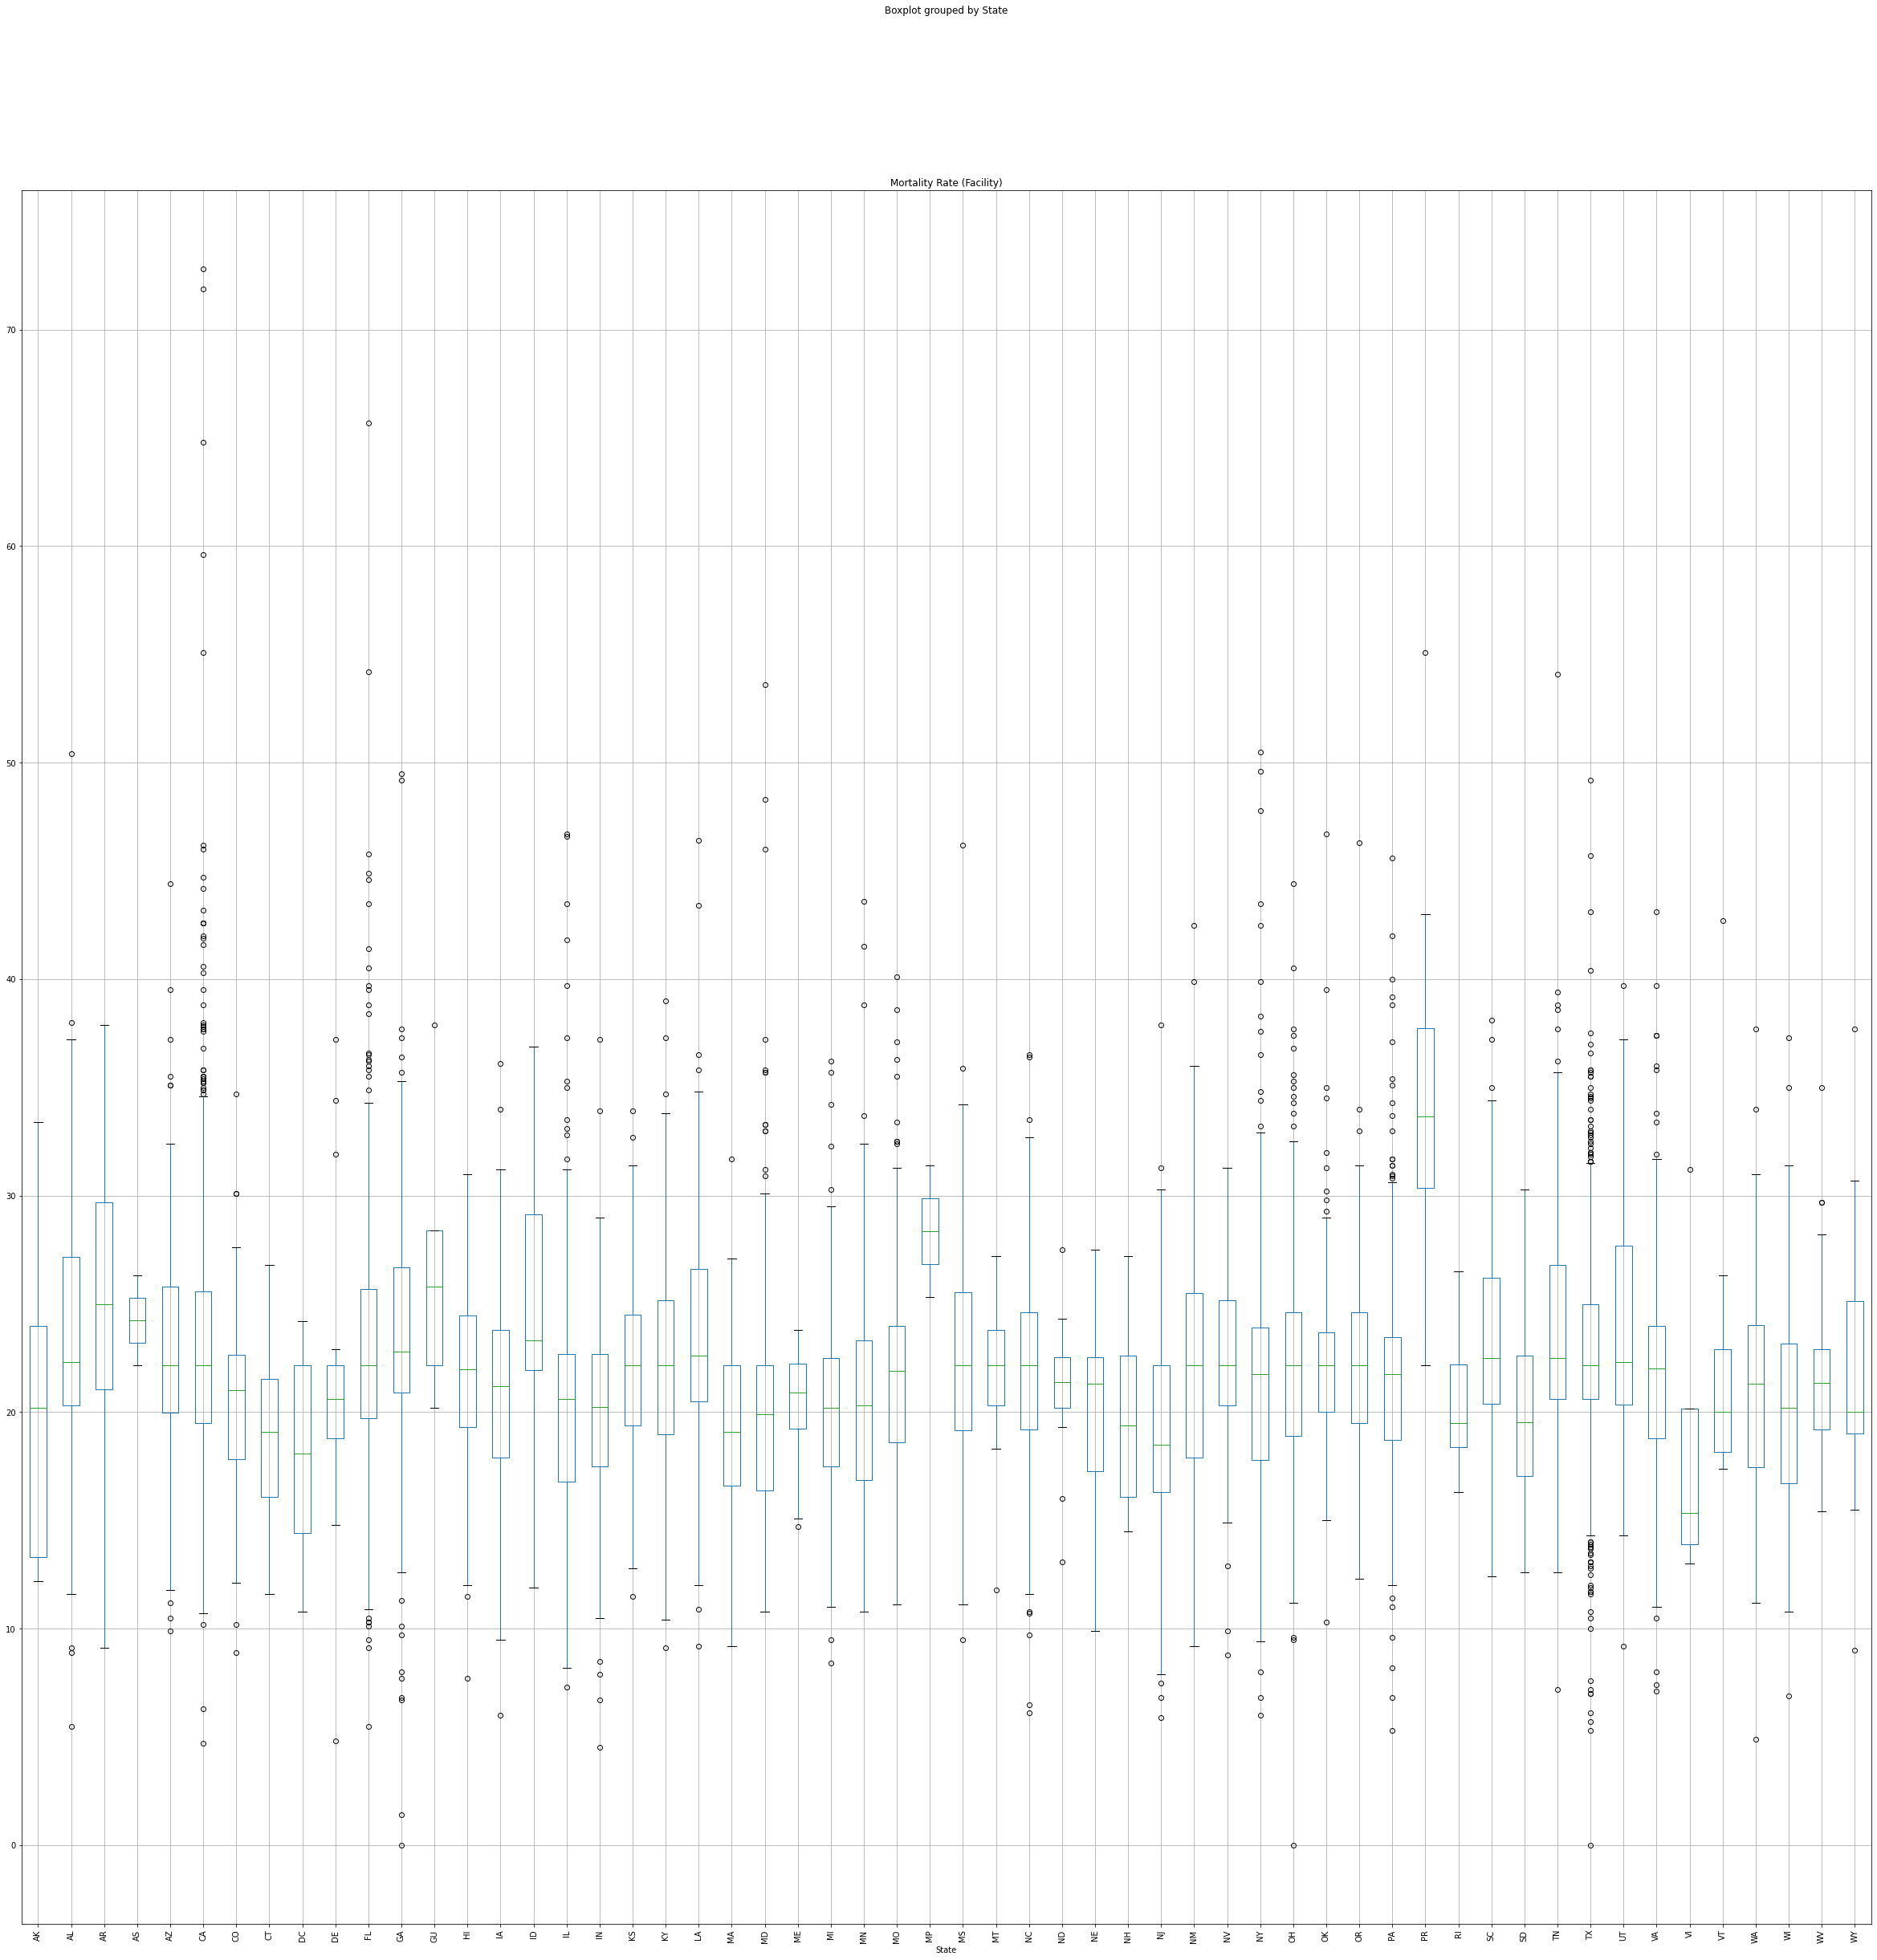

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(40,40))
_ = dialysis.boxplot('Mortality Rate (Facility)', 'State',  rot=90, ax=ax)

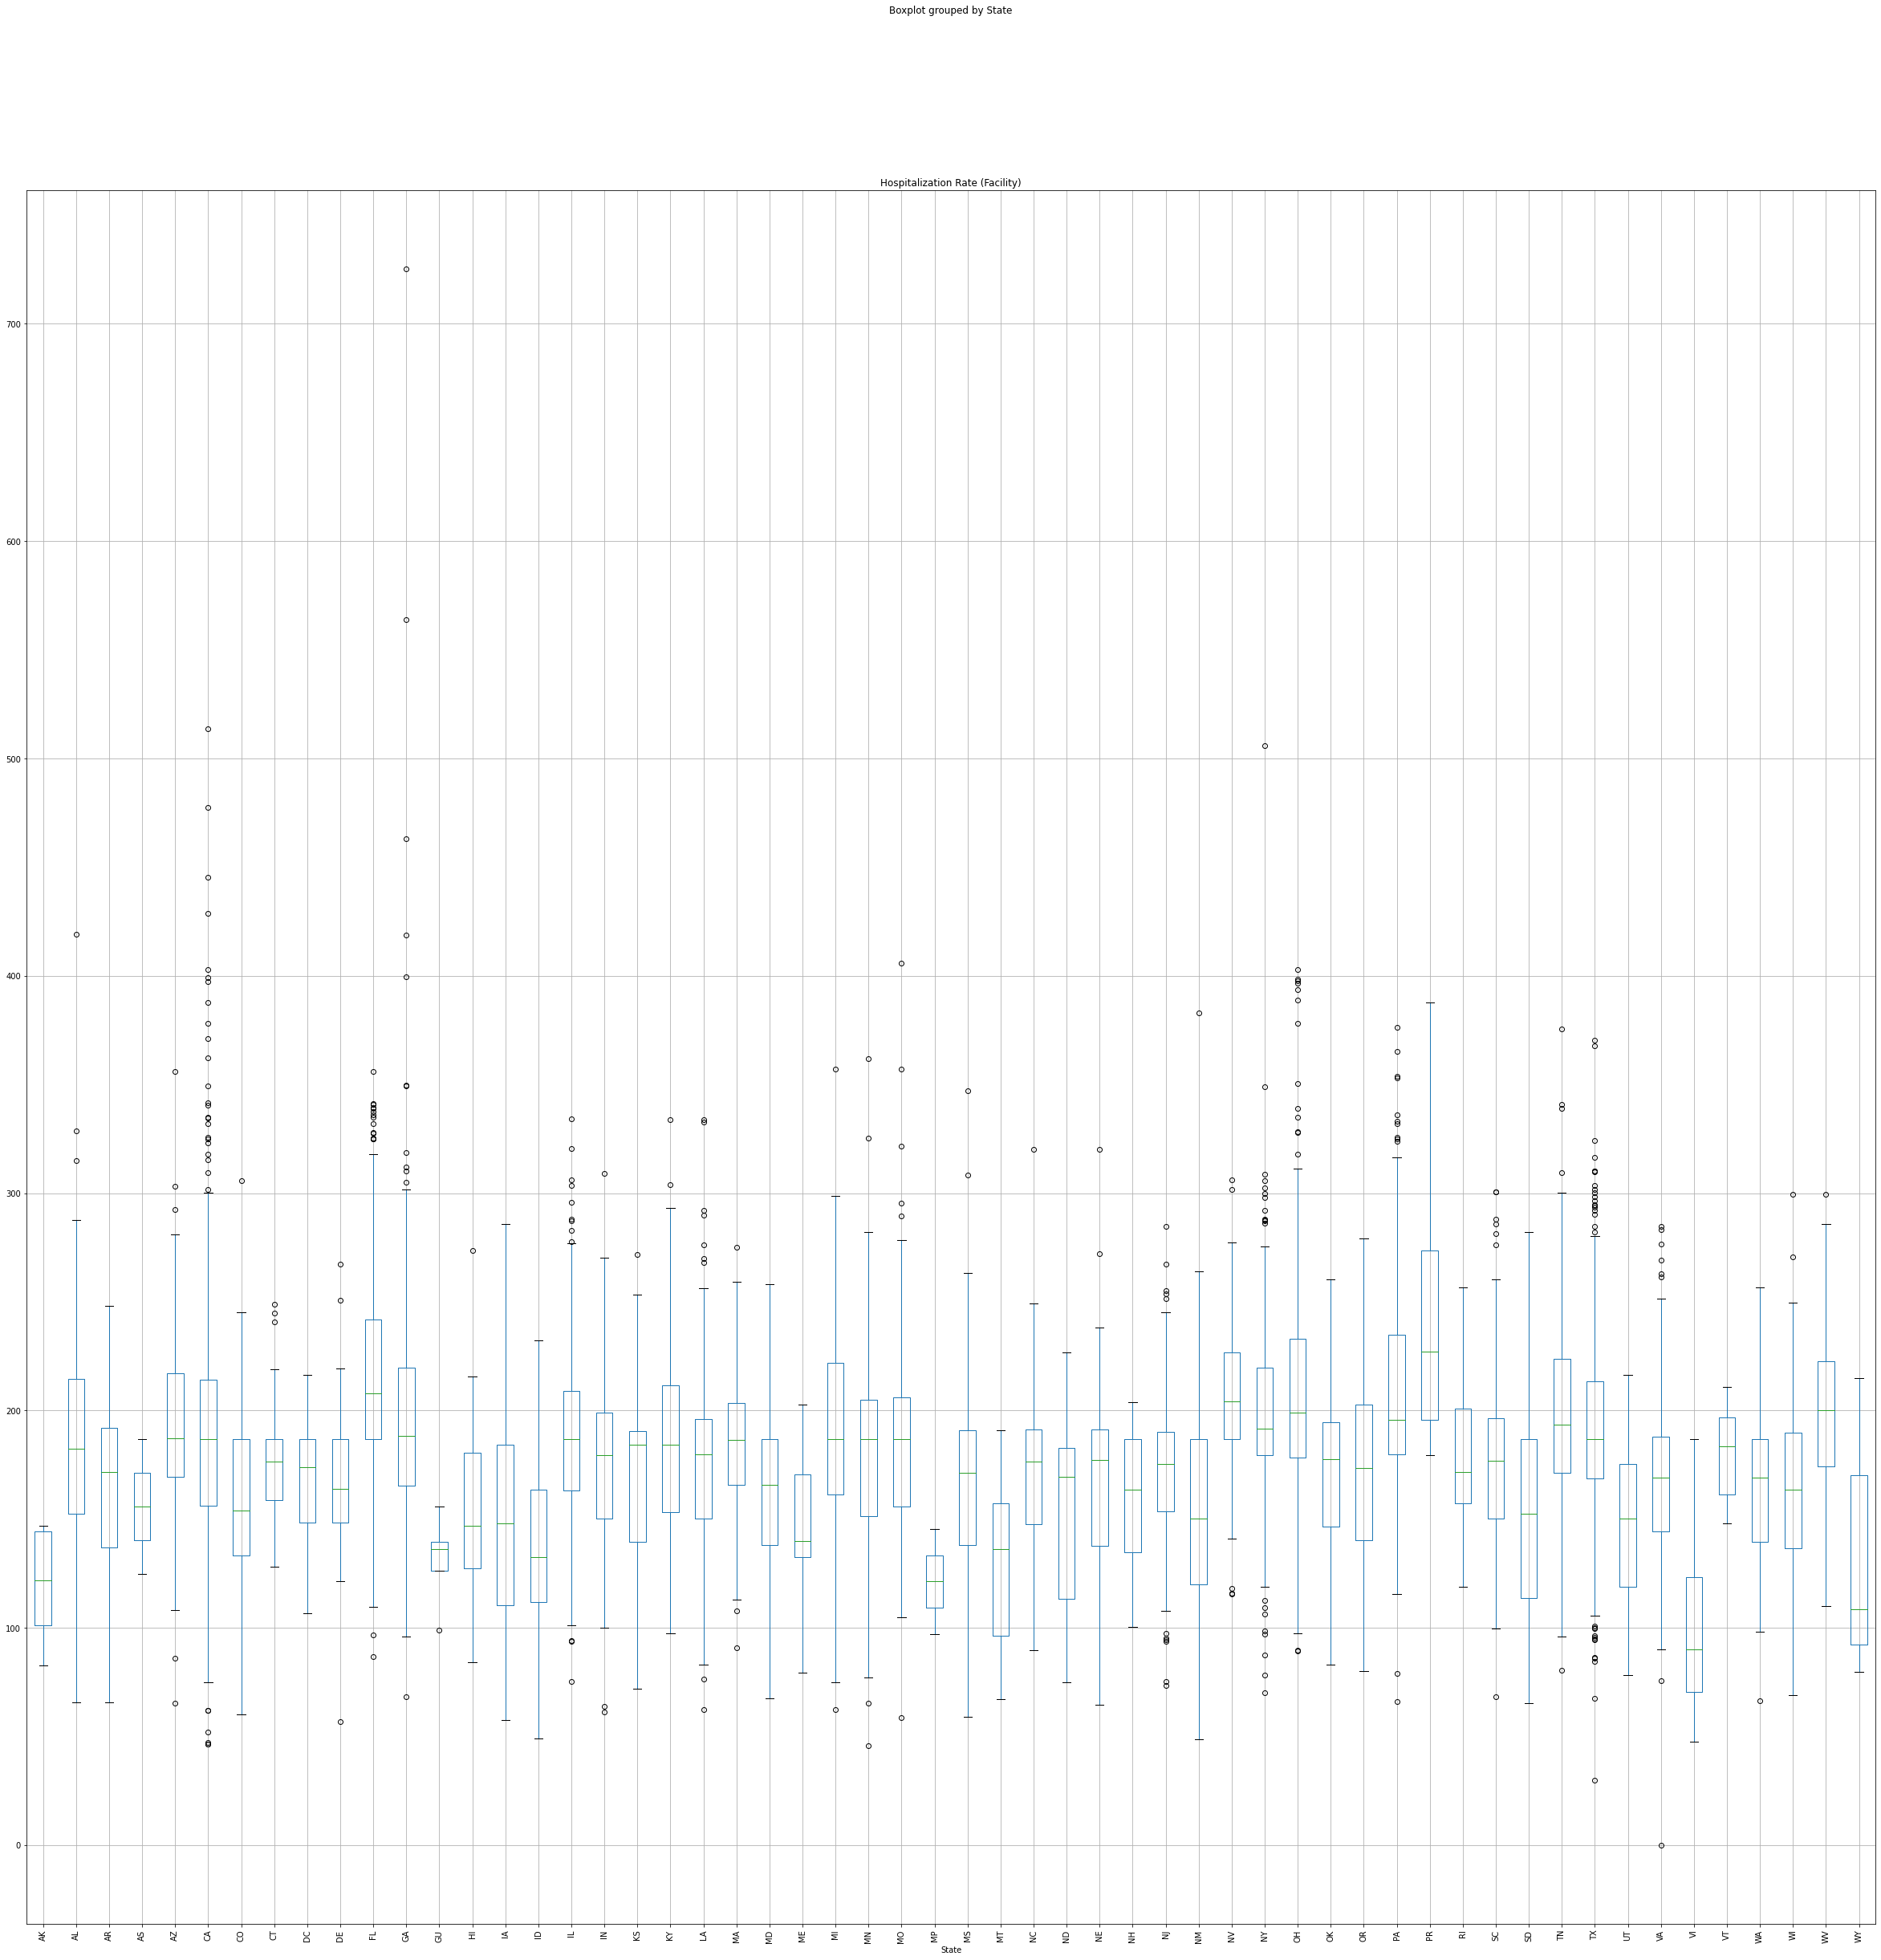

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(40,40))
_ = dialysis.boxplot('Hospitalization Rate (Facility)', 'State',  rot=90, ax=ax)

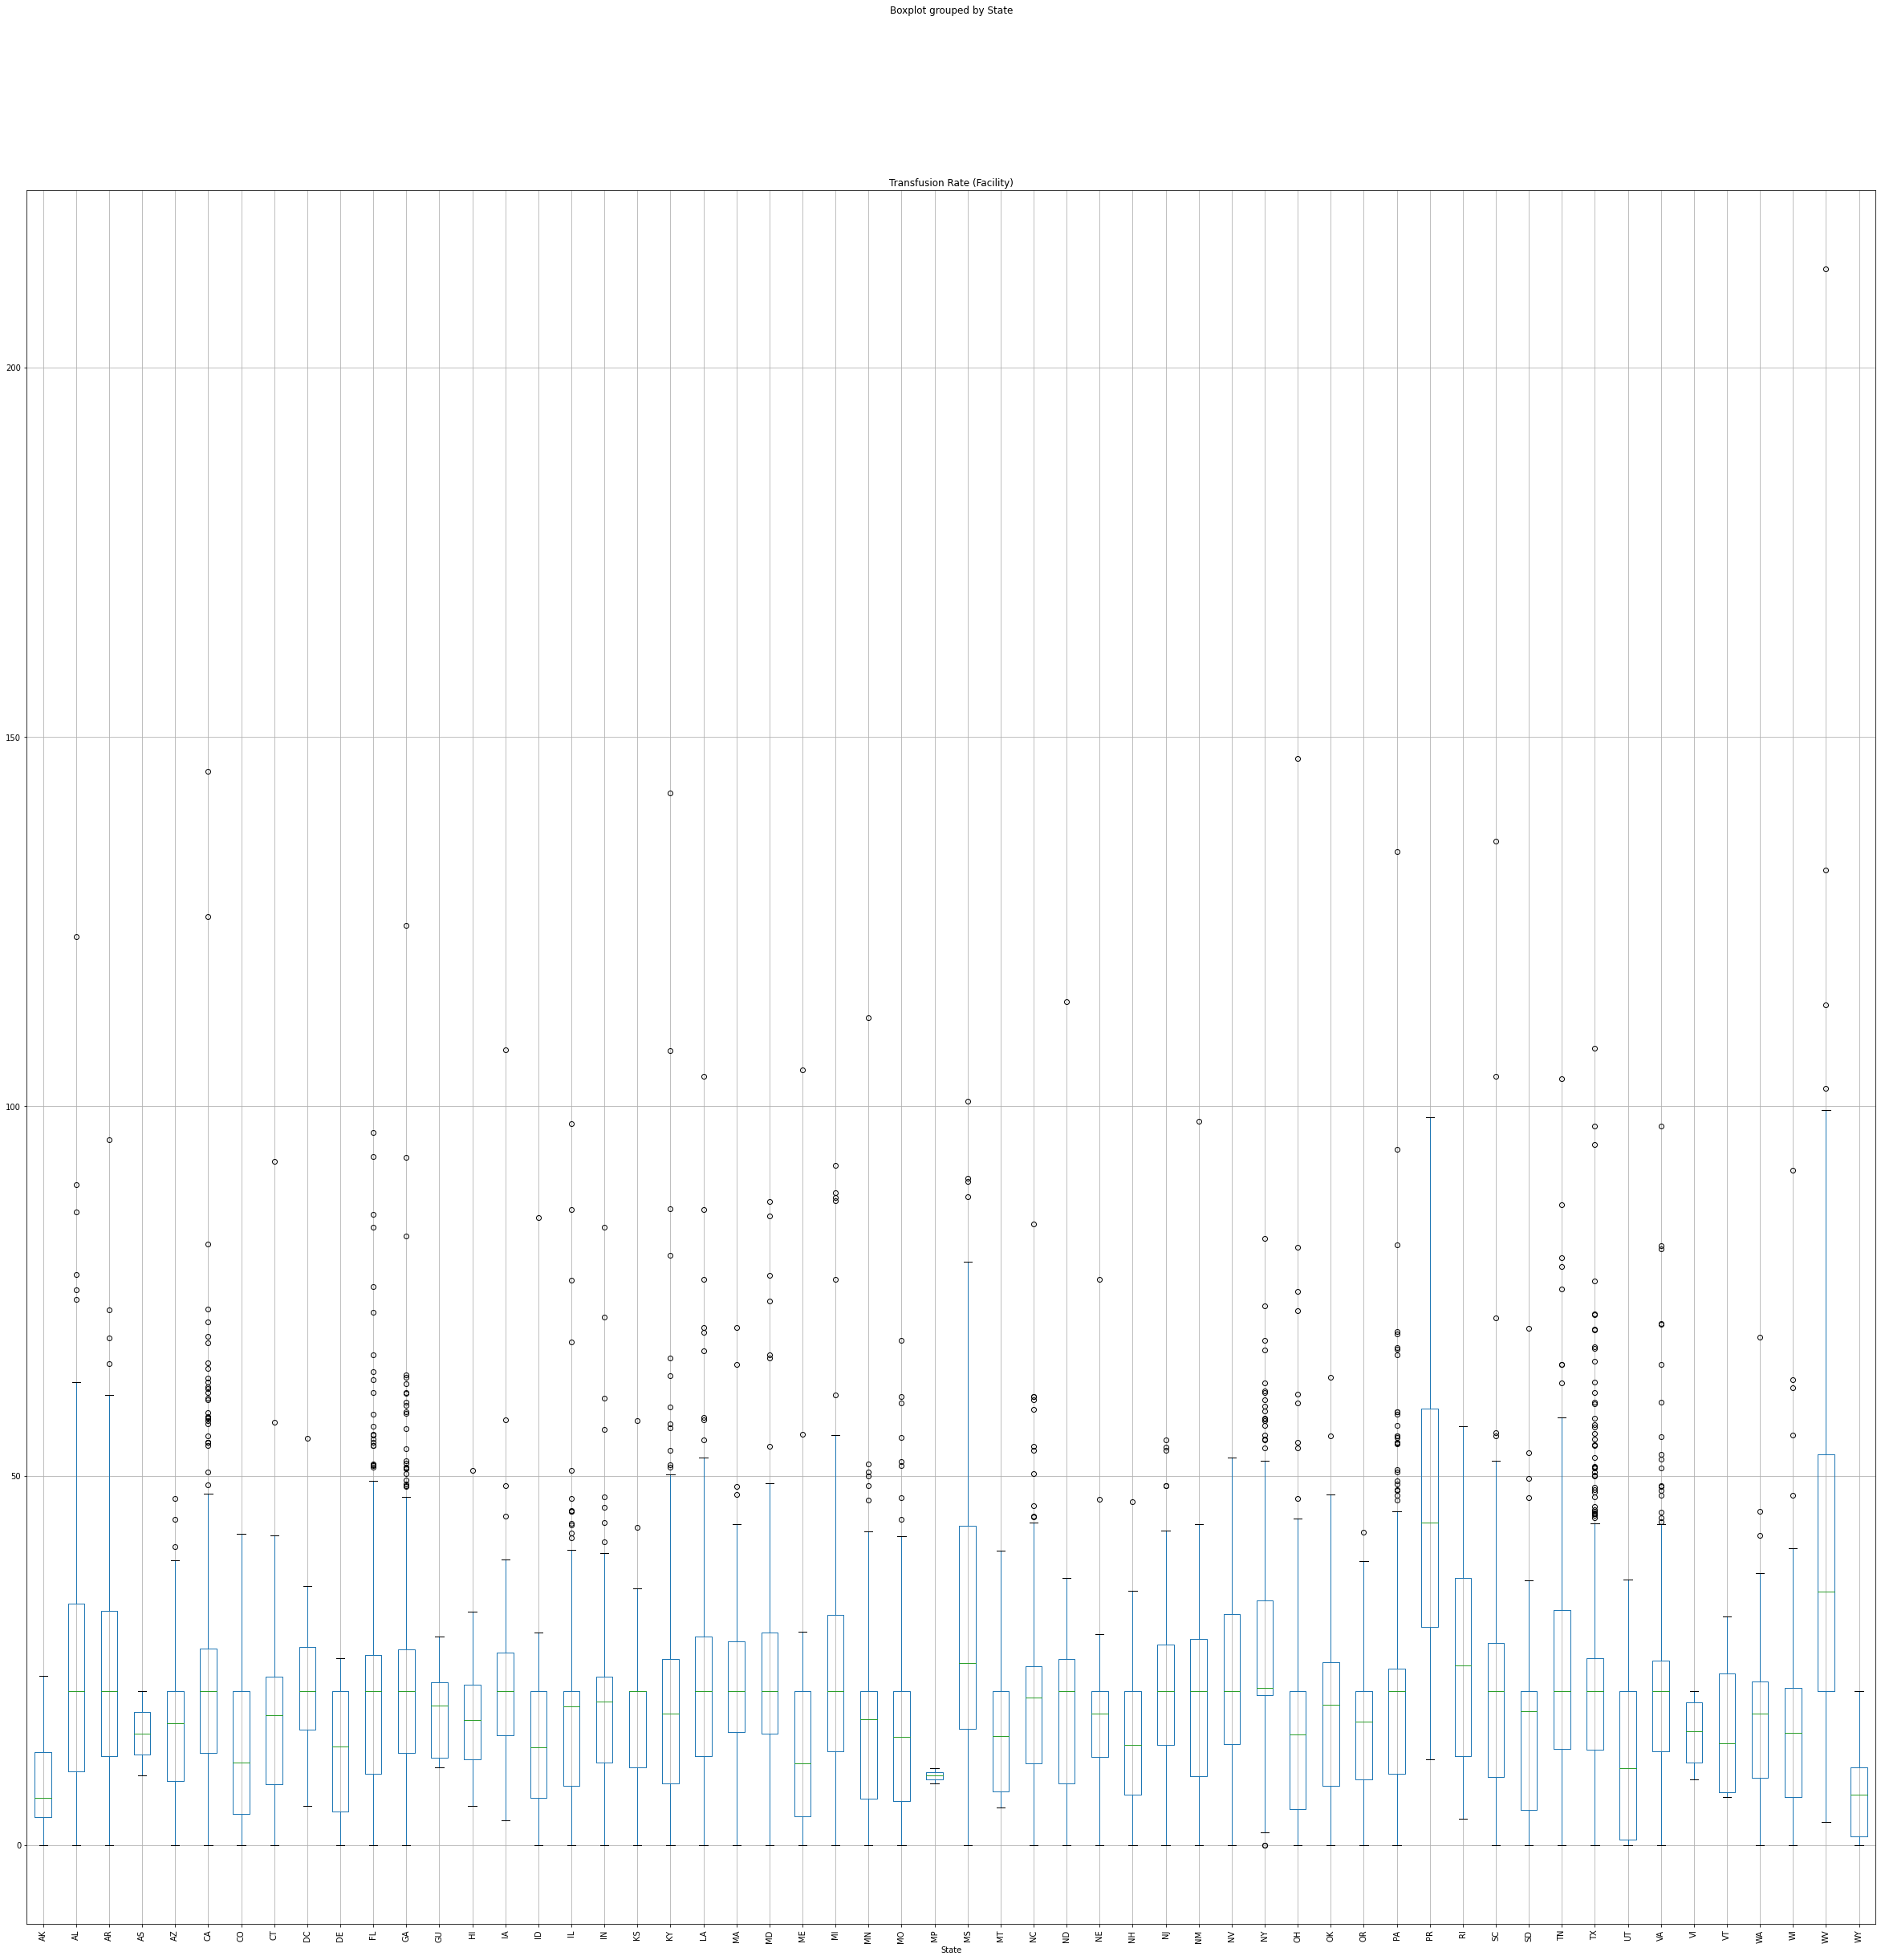

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(40,40))
_ = dialysis.boxplot('Transfusion Rate (Facility)', 'State',  rot=90, ax=ax)

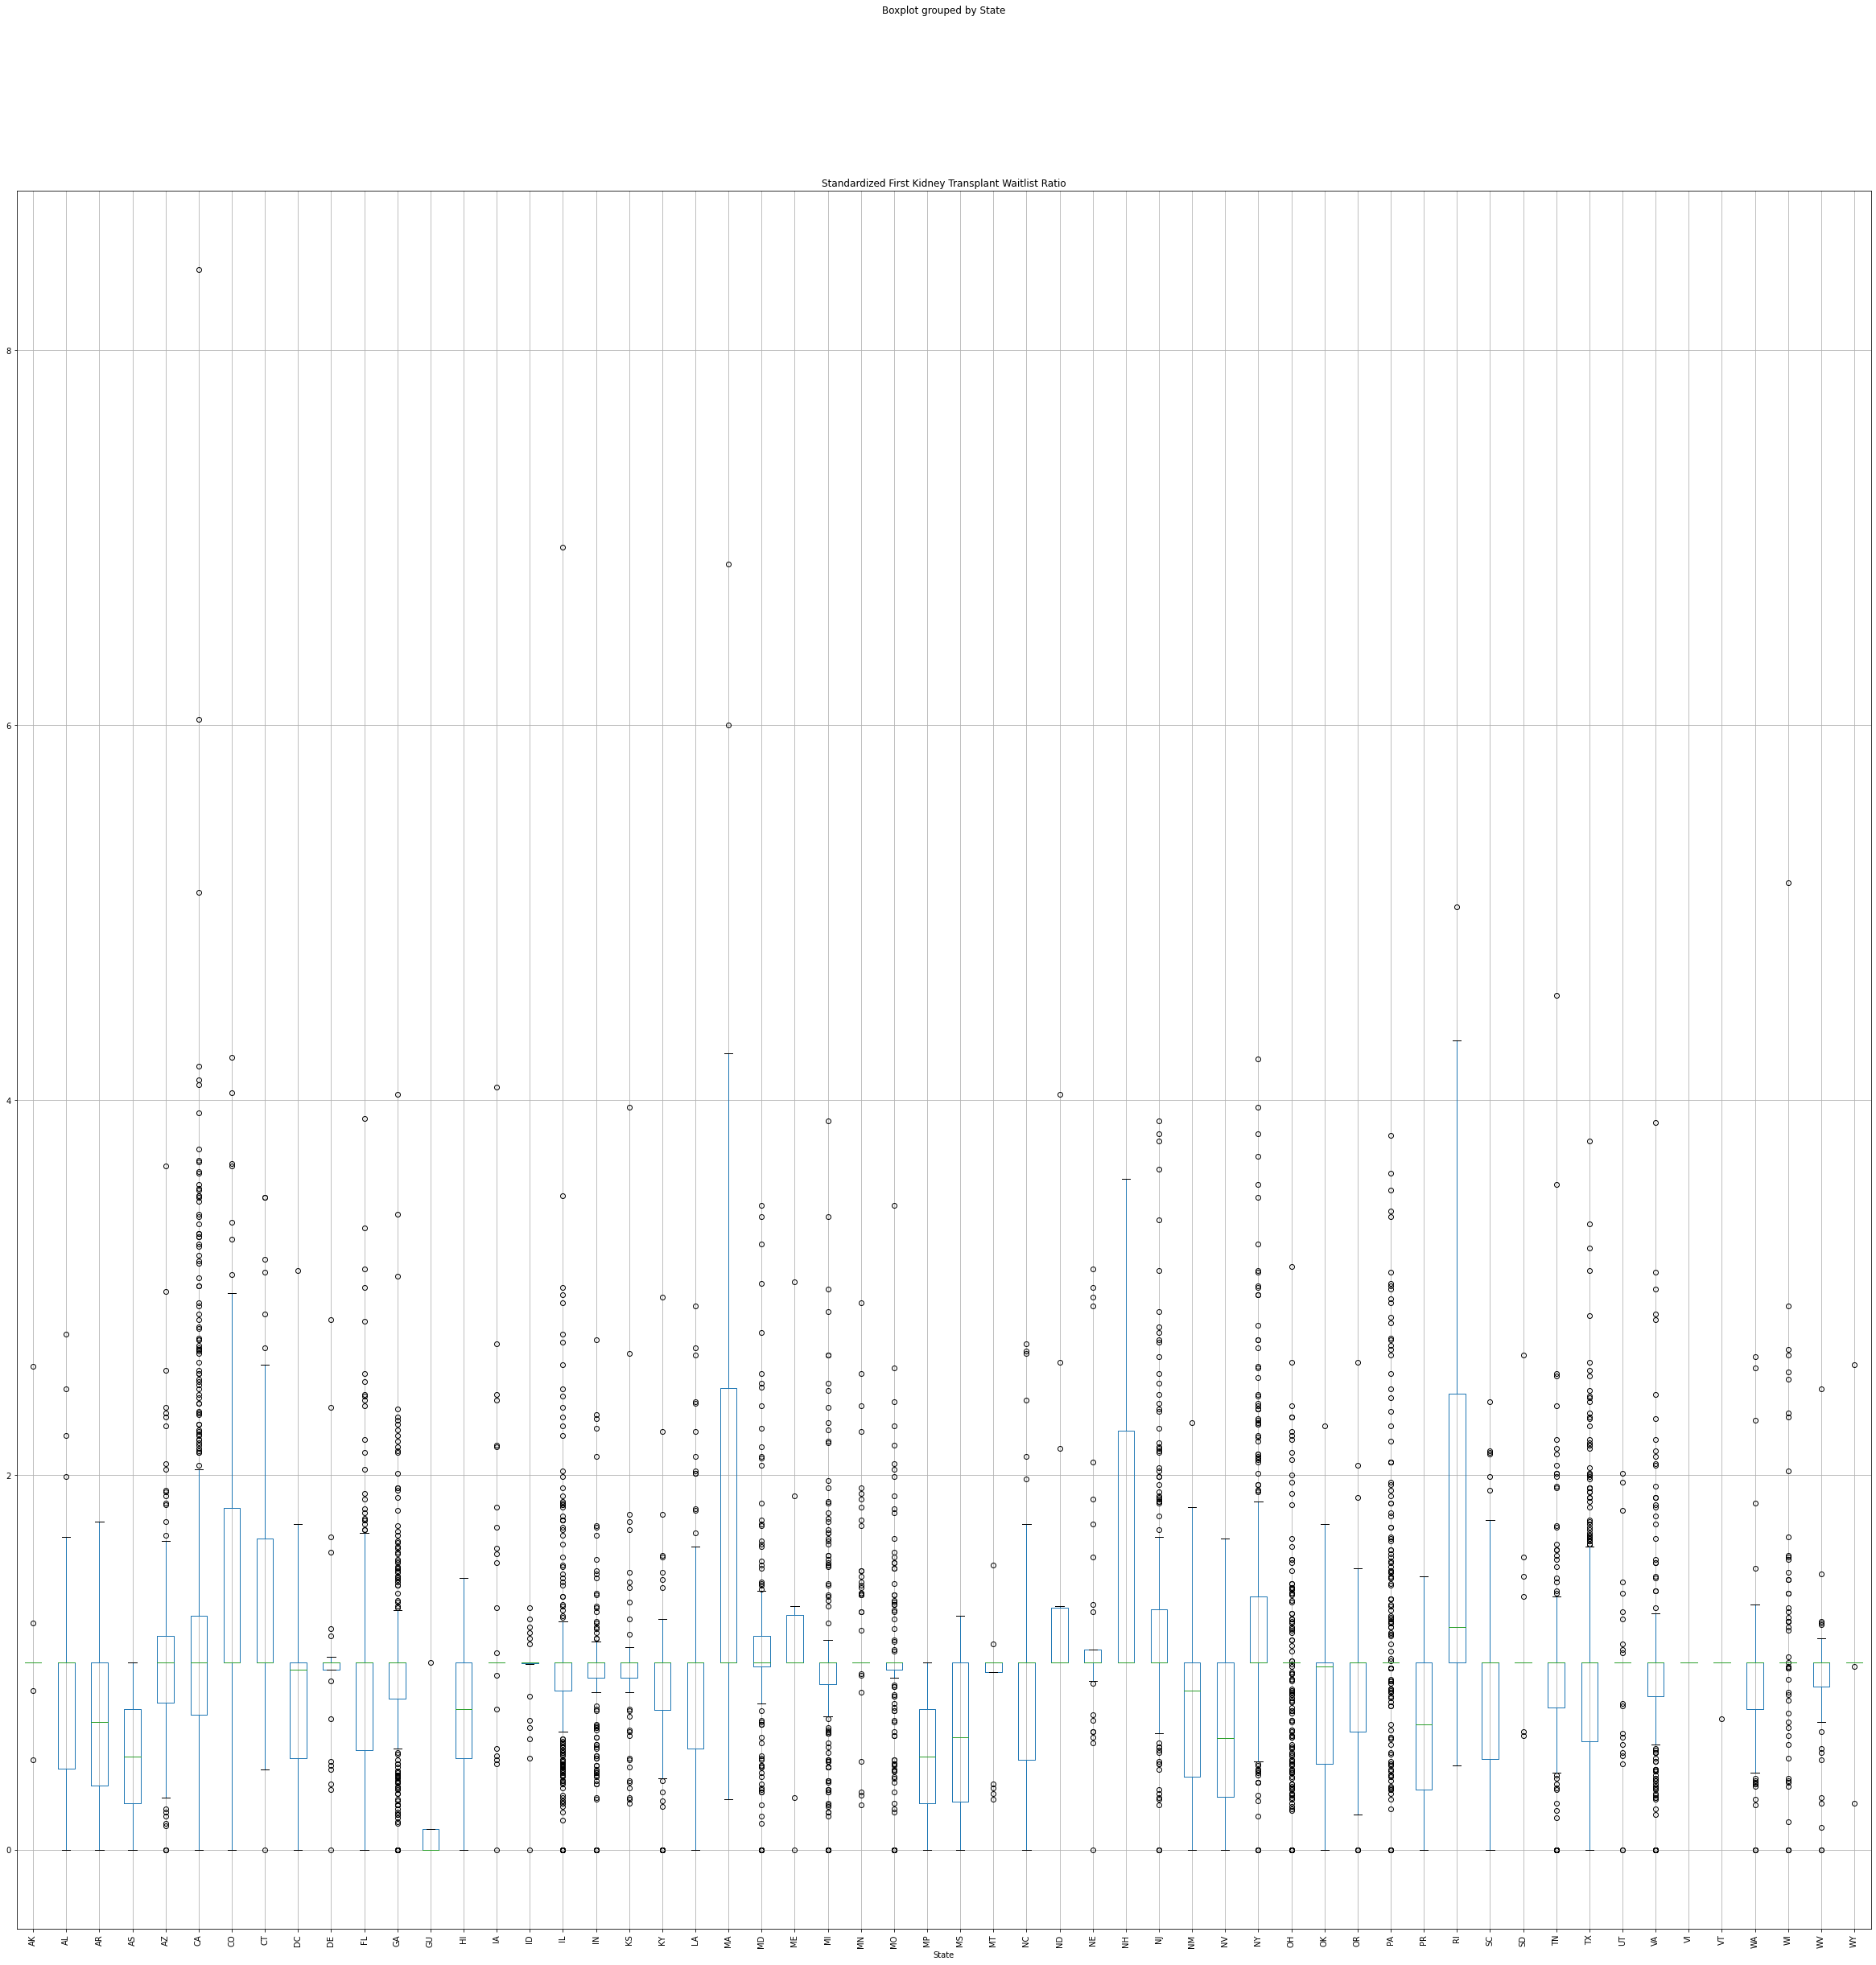

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(40,40))
_ = dialysis.boxplot('Standardized First Kidney Transplant Waitlist Ratio', 'State',  rot=90, ax=ax)

# Take Aways
The columns Percentage Of Adult Patients With Serum Phosphorus levels all appear correlated. Mostly are moderately correlated but the relationship between levels greater than 7.0 mg/dL and between 3.5 - 4.5 mg/dL are highly correlated (-0.71). This relationship should be looked into closer. Also, all the serum phorphorus correlations are negative execpt for between 3.5 - 4.5 mg/dL and less than 3.5 mg/dL, which is moderate, positive correlated (0.4). This should also be looked into further.

Five Star also has a lot of correlations; not surprisingly since the majority of it's correlations are values that contribute to a center's rating. However, the correlation values differ and it might be interesting to look into what factors are most important in determining a center's rating.


Offers In-Center Hemodialysis & Number of Dialysis Stations have a moderate, positive correlation (0.44) which makes intuitive sense in that larger facilities have more offerings.

Chain Owned and Profit or Non-Profit have a moderate, positive correlation (0.32) where chain owned appear to be more likely to be for profit.

Percent Of Adult HD Patients With Kt/V >= 1.2 has two interesting correlations. It correlates moderate, negative (-0.34) with Percentage Of Adult Patients With Long Term Catheter In Use. Also, it correlates moderate, negative (-0.47) with Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL). Considering the parameter Kt/V is a measurement of the efficacy of a hemodialysis session, it makes sense these values would have a negative correlation.

Percentage Of Prevalent Patients Waitlisted & Standardized First Kidney Transplant Waitlist Ratio have a moderate, positive correlation (0.43) which makes intuitive sense. 

Hospitalization Rate (Facility) & Readmission Rate (Facility) also have a moderate, positive correlation (0.42), which again makes intuitive sense.

Overall, it does not appear health factor's differ between states. However, PR (Puerto Rico) does seem to have non-significantly higher boxes than other states.